## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Checking for null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

## Dropping columns from the dataframe

We will drop date column as we have an unnamed column which is basically the week of the year. So you can see 52 values starting from 0 to 51. And change the name of 'Unnamed 0' column to 'Week'.

In [7]:
df['Week'] = df['Unnamed: 0']

In [8]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Week
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,3
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,7
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,8
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,9
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,10


In [9]:
df_new = df.drop('Unnamed: 0', axis = 1)

In [10]:
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,3
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,7
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,8
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,9
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,10


In [11]:
df_new.drop('Date', axis = 1, inplace = True)

In [12]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Week
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,3
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,7
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,8
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,9
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,10


## Converting to categorical values

Region

Now the reason for choosing Label Encoder was simply because there are 54 regions if we do one hot encoding our data will have 54 more columns ! That would not only create a sparse matrix but increase the complexity for no reason.

Although Label Encoder will introduce Ordinal Relationship between regions even if it does not exist but consider the size of the sparse matrix that would be formed after One-hot encoding, Label encoding seems like a better approach.

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_new['region_encoded'] = label_encoder.fit_transform(df['region'])


In [14]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Week,region_encoded
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,3,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,7,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,8,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,9,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,10,53


In [15]:
label_encoder.classes_, label_encoder.transform(label_encoder.classes_)

(array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
        'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
        'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
        'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
        'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
        'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
        'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
        'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
        'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
        'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
        'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
        'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
        'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 

Dropping the region column

In [16]:
df_new.drop('region', axis = 1, inplace = True)

In [17]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Week,region_encoded
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,2,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,3,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,7,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,8,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,9,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,10,53


Type

In [18]:
df_new['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [19]:
df_new['type_encoded'] = label_encoder.fit_transform(df['type'])

In [20]:
df_new['type_encoded'].unique()

array([0, 1])

In [21]:
df_new.drop('type', axis = 1, inplace = True)

In [22]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Week,region_encoded,type_encoded
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,1,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,2,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,3,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,7,53,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,8,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,9,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,10,53,1


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AveragePrice    18249 non-null  float64
 1   Total Volume    18249 non-null  float64
 2   4046            18249 non-null  float64
 3   4225            18249 non-null  float64
 4   4770            18249 non-null  float64
 5   Total Bags      18249 non-null  float64
 6   Small Bags      18249 non-null  float64
 7   Large Bags      18249 non-null  float64
 8   XLarge Bags     18249 non-null  float64
 9   year            18249 non-null  int64  
 10  Week            18249 non-null  int64  
 11  region_encoded  18249 non-null  int64  
 12  type_encoded    18249 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.8 MB


We will not play with the year column as even converting it using Label Encoder would not introduce any different kind of relationship.

## Keeping the test set aside (Splitting for Price Prediction)

Splitting into 80-20.

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_new, test_size = 0.2, random_state = 42)

In [25]:
train_set

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Week,region_encoded,type_encoded
16391,1.88,5376.58,147.41,871.40,0.00,4357.77,4351.10,6.67,0.00,2017,7,31,1
4990,0.81,578610.94,155537.61,153030.46,21523.37,248519.50,144796.06,103723.44,0.00,2016,50,41,0
13653,2.01,6470.08,2026.07,2529.20,0.00,1914.81,1848.75,66.06,0.00,2016,4,33,1
2074,1.02,145648.40,78195.76,38763.75,134.25,28554.64,25981.67,2572.97,0.00,2015,46,39,0
12377,1.53,40535.05,162.25,38677.24,0.00,1695.56,1695.56,0.00,0.00,2016,28,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.55,12946.65,2398.15,10206.13,0.00,342.37,342.37,0.00,0.00,2015,26,41,1
11964,1.55,1193.06,26.72,346.19,0.00,820.15,820.15,0.00,0.00,2016,31,0,1
5390,1.31,83407.69,992.24,54950.48,769.07,26695.90,26695.90,0.00,0.00,2016,34,49,0
860,1.13,277578.88,42766.16,140403.76,2028.31,92380.65,87952.58,2821.41,1606.66,2015,28,16,0


In [26]:
test_set

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Week,region_encoded,type_encoded
8604,0.82,218329.70,79239.58,26356.05,2998.74,109735.33,73393.34,34338.97,2003.02,2018,6,10,0
2608,0.97,391514.43,228324.13,72749.38,100.62,90340.30,44449.47,45890.83,0.00,2015,8,50,0
14581,1.44,3907.40,1147.09,39.51,0.00,2720.80,2717.47,3.33,0.00,2016,48,50,1
4254,0.97,267953.78,150786.30,27025.48,565.65,89576.35,74664.71,14911.64,0.00,2016,42,27,0
16588,1.45,8805.28,828.39,3.24,0.00,7973.65,7456.43,517.22,0.00,2017,45,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15956,1.27,77418.61,10912.94,21788.20,3.12,44714.35,41824.67,2889.68,0.00,2017,49,22,1
12471,1.67,7223.46,629.11,4017.95,0.00,2576.40,1129.77,1446.63,0.00,2016,18,10,1
4574,0.59,1276128.92,868817.82,252752.29,12047.67,142511.14,91807.54,50703.60,0.00,2016,50,33,0
16359,1.92,20003.65,14.31,370.78,0.00,19618.56,19618.56,0.00,0.00,2017,28,30,1


## Visualizations and Descriptions

In [27]:
train_set.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Week,region_encoded,type_encoded
count,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000,14599.000000,14599.000000,14599.000000
mean,1.404860,8.486369e+05,2.934236e+05,2.943944e+05,2.277926e+04,2.380376e+05,1.808815e+05,5.403939e+04,3116.713649,2016.148777,24.140078,26.513528,0.499555
std,0.403128,3.404709e+06,1.243118e+06,1.195564e+06,1.076246e+05,9.670539e+05,7.305218e+05,2.401997e+05,17607.337329,0.940367,15.455314,15.588548,0.500017
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,1.100000,1.086533e+04,8.547250e+02,2.997545e+03,0.000000e+00,5.121780e+03,2.884600e+03,1.236350e+02,0.000000,2015.000000,10.000000,13.000000,0.000000
50%,1.370000,1.091119e+05,8.762480e+03,2.971125e+04,1.905800e+02,4.012544e+04,2.655889e+04,2.693840e+03,0.000000,2016.000000,24.000000,27.000000,0.000000
75%,1.660000,4.354375e+05,1.113795e+05,1.507282e+05,6.231185e+03,1.115398e+05,8.370342e+04,2.242839e+04,133.925000,2017.000000,38.000000,40.000000,1.000000
max,3.170000,5.228870e+07,1.778761e+07,2.047057e+07,2.546439e+06,1.639452e+07,1.254033e+07,4.324231e+06,551693.650000,2018.000000,52.000000,53.000000,1.000000


There seems to be a lot of outliers in XLarge Bags ! We will plot the data for further analysis.

Univariate Analysis

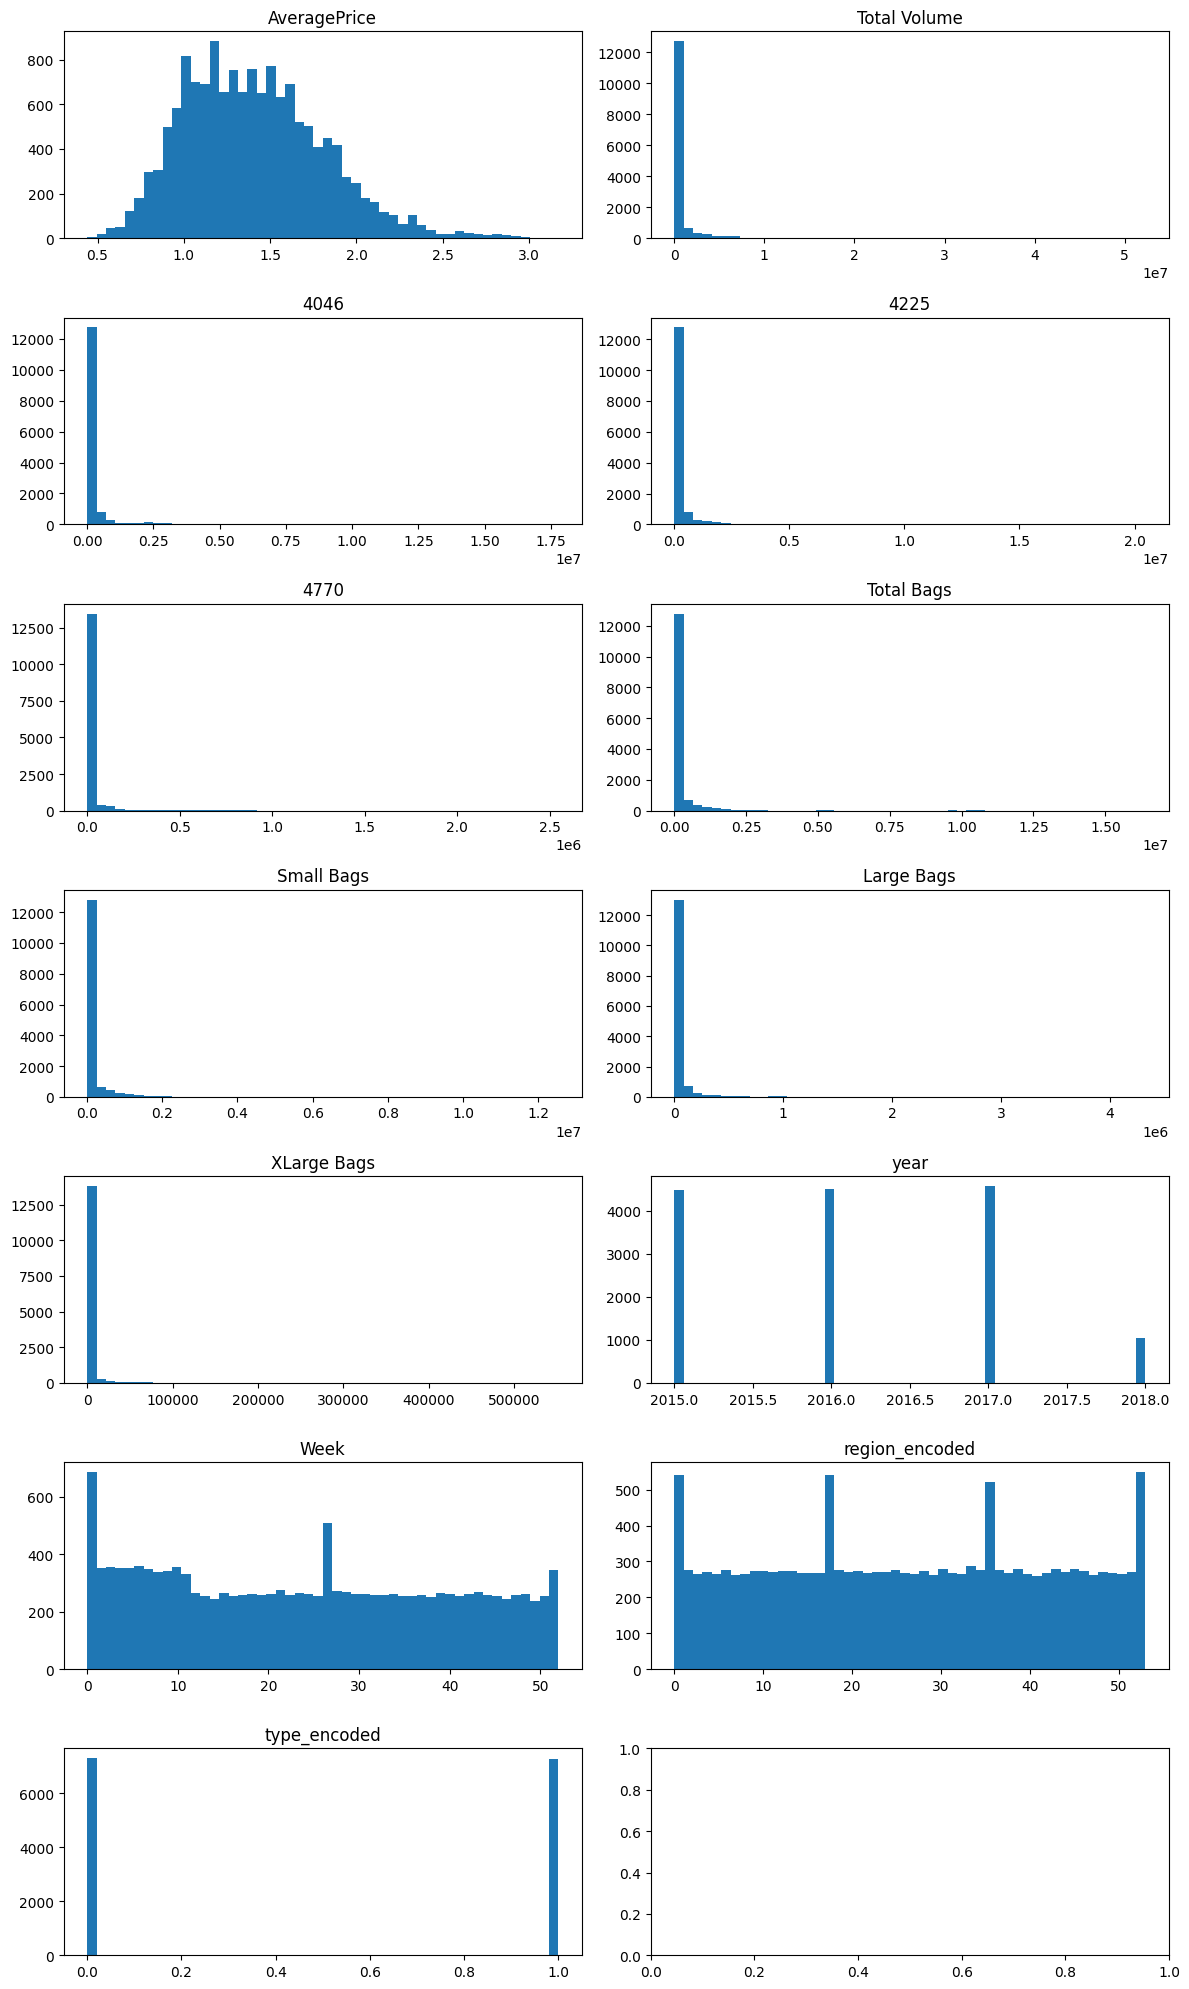

In [28]:
num_histograms = 13
num_cols = 2
num_rows = 7
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(train_set.columns[:num_histograms]):
    axes[i].hist(train_set[col], bins=50)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


It is evident from the plots that - XLarge Bags, Large Bags, Total Bags,Small Bags, Total Volume, 4770, 4225, 4046 are skewed to the right.

Boxplot for Outlier detection

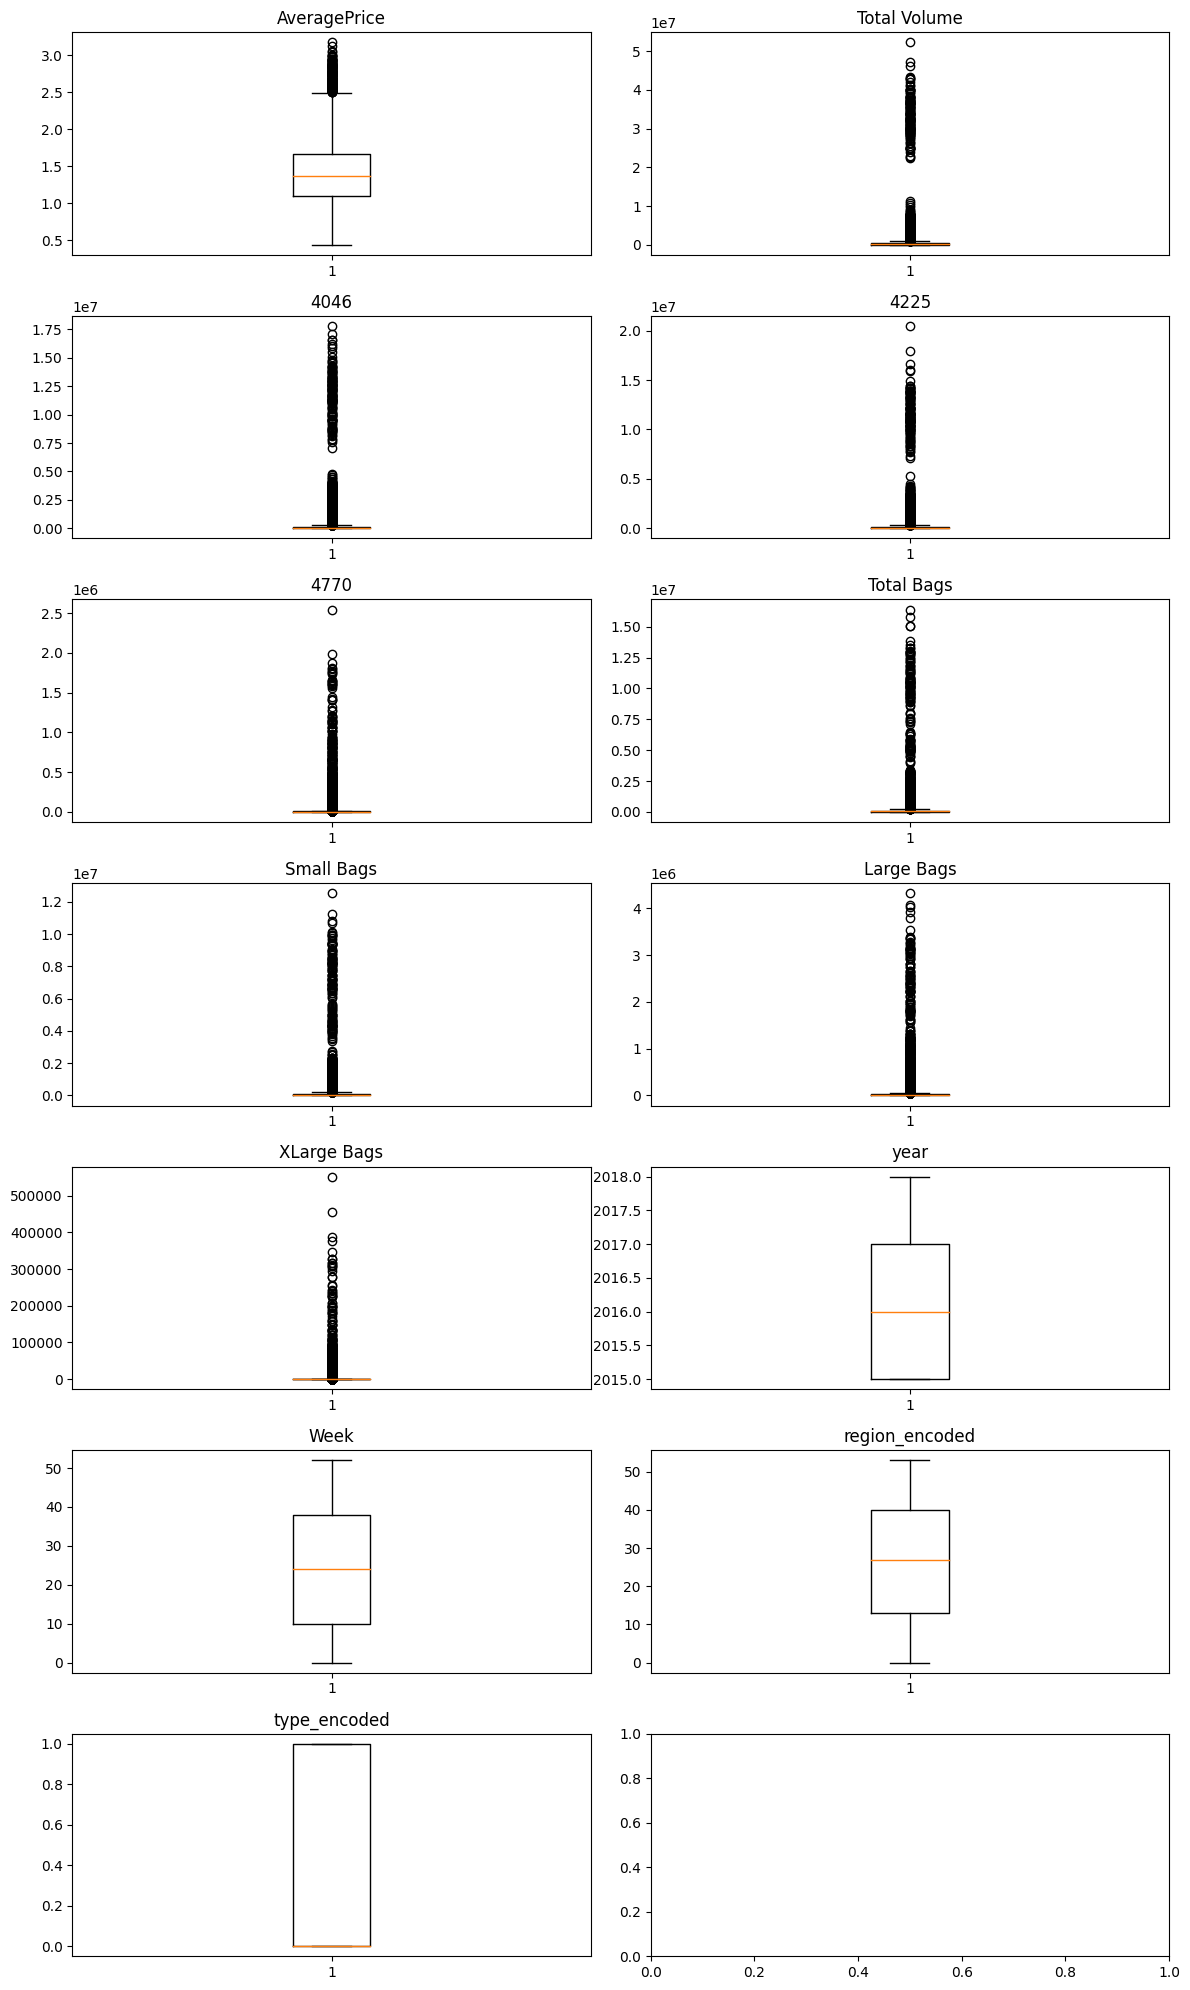

In [29]:
num_histograms = 13
num_cols = 2
num_rows = 7
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(train_set.columns[:num_histograms]):
    axes[i].boxplot(train_set[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [30]:
train_set.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Week',
       'region_encoded', 'type_encoded'],
      dtype='object')

In [31]:
def num_outliers(data, name):
  data = data

  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1


  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = data[(data < lower_bound) | (data > upper_bound)]
  num_outliers = len(outliers)

  print("Number of outliers:{}, Column_Name:{}".format(num_outliers, name))


for i in train_set.columns:
  num_outliers(train_set[i], i)

Number of outliers:170, Column_Name:AveragePrice
Number of outliers:1838, Column_Name:Total Volume
Number of outliers:2032, Column_Name:4046
Number of outliers:1991, Column_Name:4225
Number of outliers:2332, Column_Name:4770
Number of outliers:2038, Column_Name:Total Bags
Number of outliers:1926, Column_Name:Small Bags
Number of outliers:2146, Column_Name:Large Bags
Number of outliers:3212, Column_Name:XLarge Bags
Number of outliers:0, Column_Name:year
Number of outliers:0, Column_Name:Week
Number of outliers:0, Column_Name:region_encoded
Number of outliers:0, Column_Name:type_encoded


It is evident that there are around 2000 outliers on average which means we cannot get rid of them for 2 reasons.
1.) The data received is correct and real life, getting rid of it will result in loss of information.
2.) When the percent of outliers like in this case is somewhere around 15-20% cannot be considred as outliers.

Bivariate Analysis

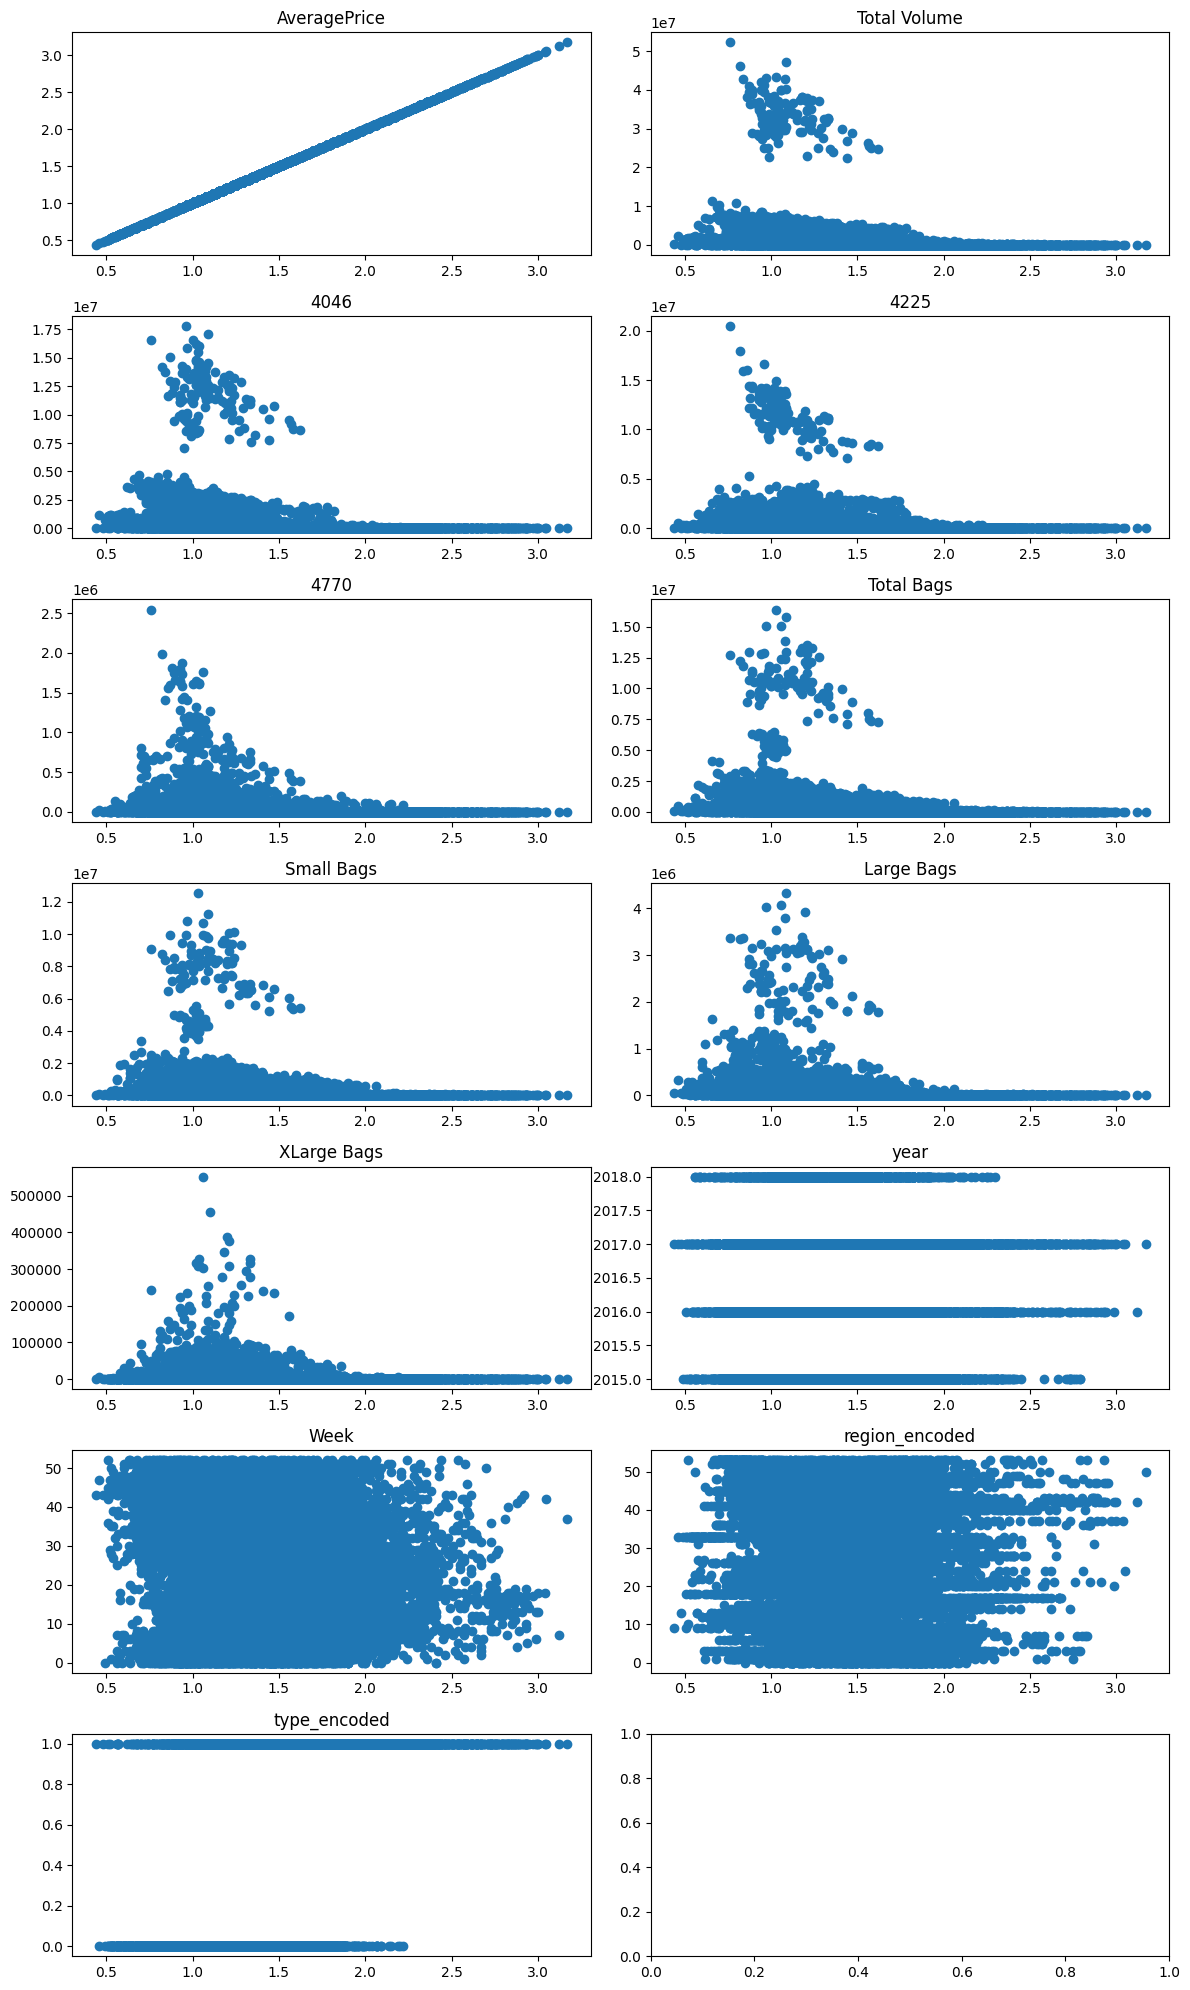

In [32]:
num_histograms = 13
num_cols = 2
num_rows = 7
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(train_set.columns[:num_histograms]):
    axes[i].scatter(train_set['AveragePrice'], train_set[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Correlations

In [33]:
train_set.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Week,region_encoded,type_encoded
AveragePrice,1.000000,-0.194869,-0.211984,-0.173784,-0.180006,-0.178697,-0.176604,-0.173638,-0.118634,0.091883,-0.124156,-0.015123,0.619276
Total Volume,-0.194869,1.000000,0.976845,0.974054,0.869199,0.964046,0.968059,0.882444,0.745878,0.013000,0.011285,0.173656,-0.234929
4046,-0.211984,0.976845,1.000000,0.922989,0.827669,0.920515,0.925355,0.840607,0.697542,-0.000756,0.014890,0.192822,-0.229852
4225,-0.173784,0.974054,0.922989,1.000000,0.884501,0.908151,0.918258,0.812866,0.691372,-0.013627,0.016683,0.144776,-0.233046
4770,-0.180006,0.869199,0.827669,0.884501,1.000000,0.791453,0.801168,0.699274,0.689607,-0.039562,0.038565,0.093955,-0.208982
Total Bags,-0.178697,0.964046,0.920515,0.908151,0.791453,1.000000,0.994332,0.943484,0.797861,0.067988,-0.004327,0.174083,-0.220277
Small Bags,-0.176604,0.968059,0.925355,0.918258,0.801168,0.994332,1.000000,0.903210,0.800809,0.060207,-0.001975,0.163182,-0.223454
Large Bags,-0.173638,0.882444,0.840607,0.812866,0.699274,0.943484,0.903210,1.000000,0.703410,0.084963,-0.010606,0.198857,-0.194293
XLarge Bags,-0.118634,0.745878,0.697542,0.691372,0.689607,0.797861,0.800809,0.703410,1.000000,0.077101,-0.011003,0.078042,-0.176793
year,0.091883,0.013000,-0.000756,-0.013627,-0.039562,0.067988,0.060207,0.084963,0.077101,1.000000,-0.176927,-0.000502,0.005823


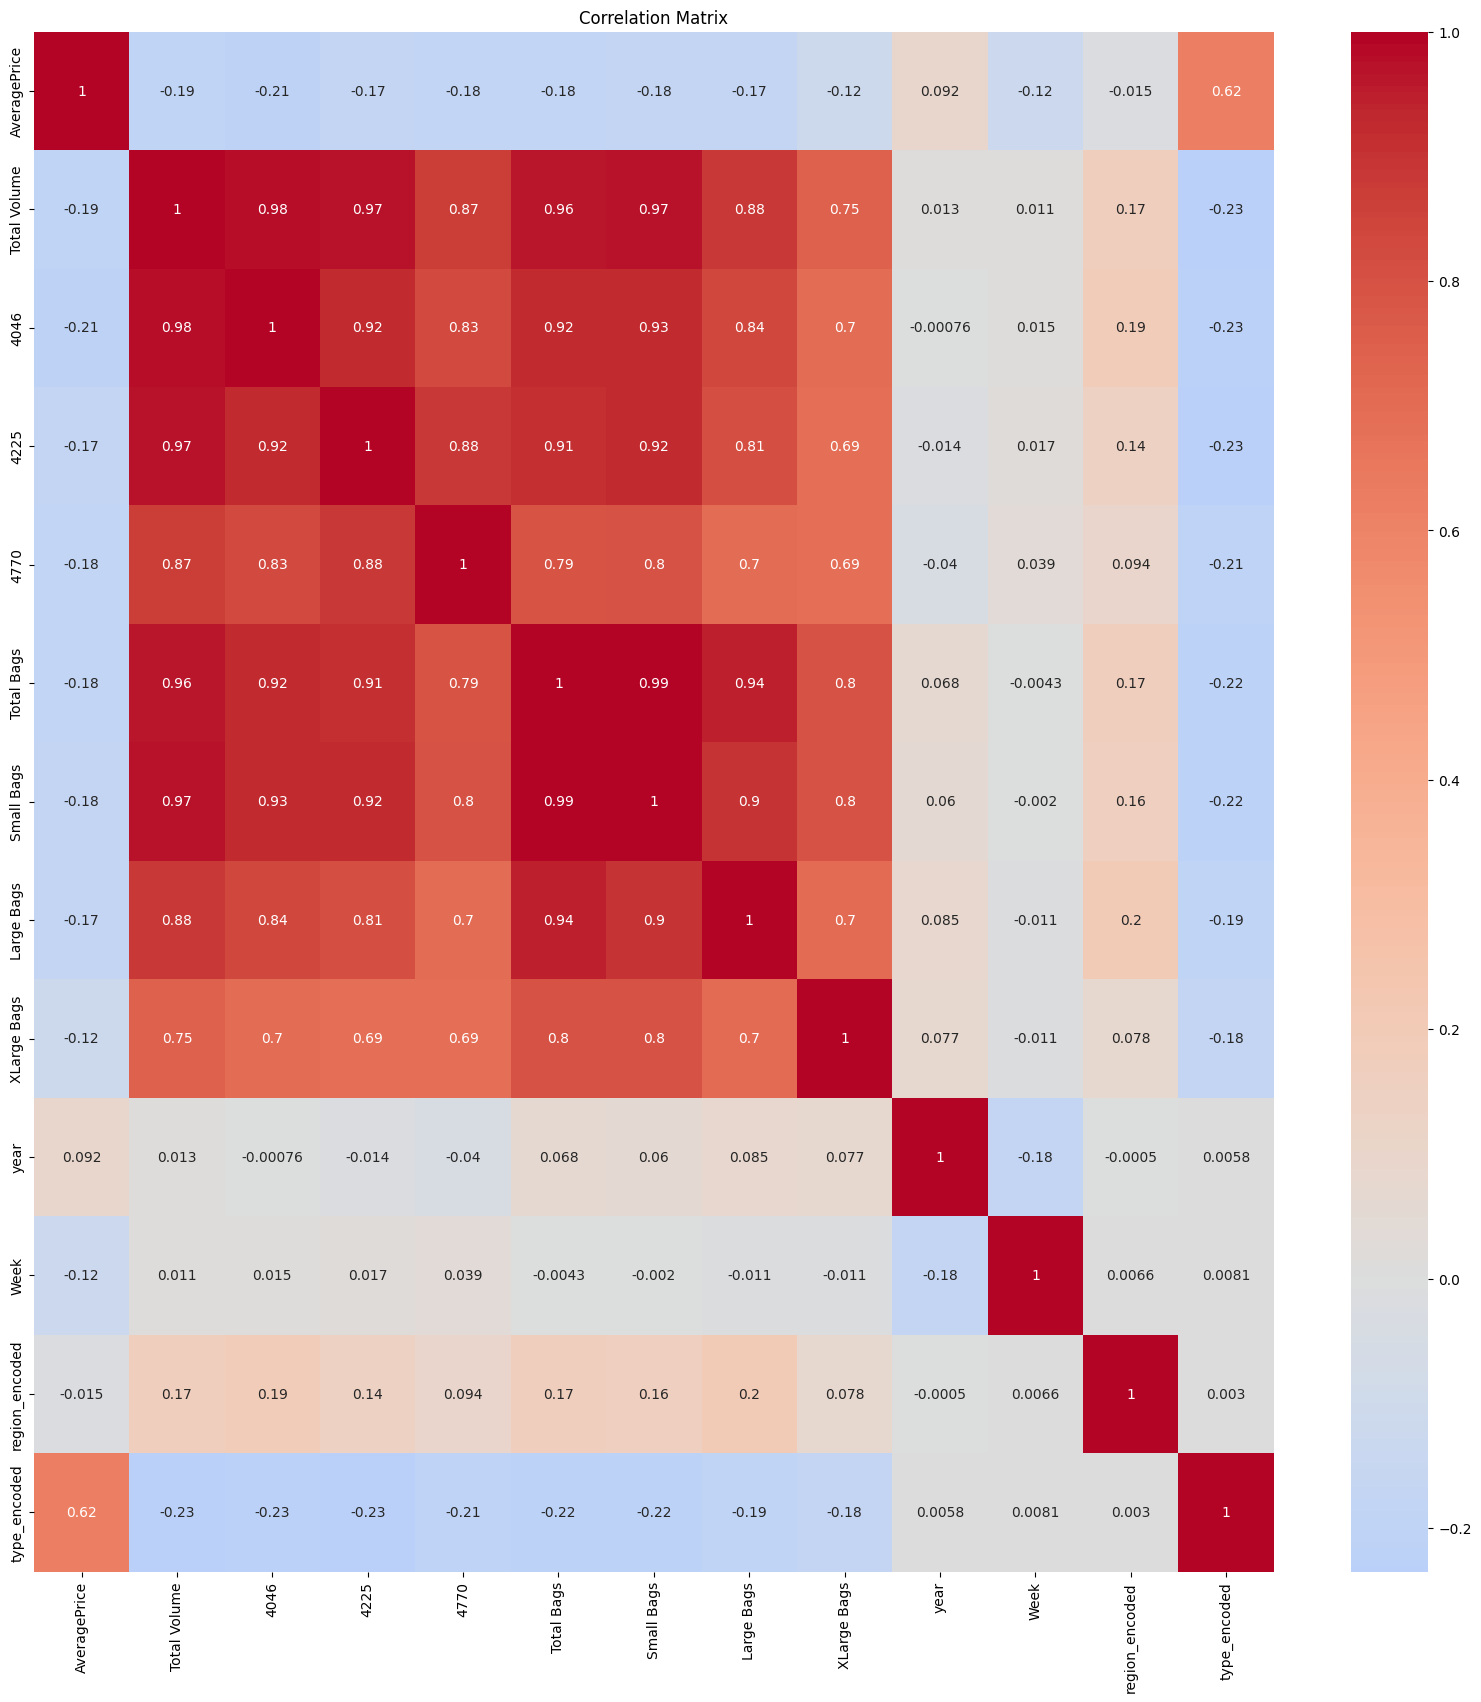

In [34]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_set.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Skewness

In [35]:
train_set.skew()

,0
AveragePrice,0.591298
Total Volume,8.821023
4046,8.390982
4225,8.806629
4770,10.146073
Total Bags,9.549492
Small Bags,9.338082
Large Bags,9.562212
XLarge Bags,13.190486
year,0.215391


XLarge Bags

In [36]:
train_set['XLarge Bags'] = np.log1p(train_set['XLarge Bags'])
test_set['XLarge Bags'] = np.log1p(test_set['XLarge Bags'])

Large Bags

In [37]:
train_set['Large Bags'] = np.log1p(train_set['Large Bags'])
test_set['Large Bags'] = np.log1p(test_set['Large Bags'])

Small Bags

In [38]:
train_set['Small Bags'] = np.log1p(train_set['Small Bags'])
test_set['Small Bags'] = np.log1p(test_set['Small Bags'])

4046

In [39]:
train_set['4046'] = np.log1p(train_set['4046'])
test_set['4046'] = np.log1p(test_set['4046'])

4225

In [40]:
train_set['4225'] = np.log1p(train_set['4225'])
test_set['4225'] = np.log1p(test_set['4225'])

4770

In [41]:
train_set['4770'] = np.log1p(train_set['4770'])
test_set['4770'] = np.log1p(test_set['4770'])

Total volume

In [42]:
train_set['Total Volume'] = np.log1p(train_set['Total Volume'])
test_set['Total Volume'] = np.log1p(test_set['Total Volume'])

Total Bags

In [43]:
train_set['Total Bags'] = np.log1p(train_set['Total Bags'])
test_set['Total Bags'] = np.log1p(test_set['Total Bags'])

In [44]:
train_set.skew()

,0
AveragePrice,0.591298
Total Volume,0.087068
4046,-0.332528
4225,-0.475988
4770,0.092233
Total Bags,-0.221023
Small Bags,-0.626631
Large Bags,-0.550697
XLarge Bags,1.172162
year,0.215391


## VIF

Something which is quite obvious and logical is that Total Bags and Total volume will always go up as the values of small, large, xlarge bags go up.

So we will get rid of these 2 columns.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = train_set.columns
vif['VIF'] = [variance_inflation_factor(train_set.values, i) for i in range(train_set.shape[1])]
vif

,Features,VIF
0,AveragePrice,27.289525
1,Total Volume,1104.316934
2,4046,50.388838
3,4225,122.587076
4,4770,10.179028
5,Total Bags,500.930966
6,Small Bags,160.592376
7,Large Bags,12.543890
8,XLarge Bags,2.805739
9,year,191.299017


In [46]:
train_set.drop(['Total Bags', 'Total Volume'], axis = 1, inplace = True)
test_set.drop(['Total Bags', 'Total Volume'], axis = 1, inplace = True)

In [47]:
vif = pd.DataFrame()
vif['Features'] = train_set.columns
vif['VIF'] = [variance_inflation_factor(train_set.values, i) for i in range(train_set.shape[1])]
vif

,Features,VIF
0,AveragePrice,25.018670
1,4046,28.843200
2,4225,50.139069
3,4770,10.176747
4,Small Bags,45.512970
5,Large Bags,8.298784
6,XLarge Bags,2.759746
7,year,86.746011
8,Week,3.649285
9,region_encoded,4.250986


For now we will retain the rest of the columns

## Splitting the data into X_train, y_train, X_test, y_test

In [48]:
X_train = train_set.drop('AveragePrice', axis = 1)
y_train = train_set['AveragePrice']

In [49]:
X_test = test_set.drop('AveragePrice', axis = 1)
y_test = test_set['AveragePrice']

In [50]:
y_test.shape

(3650,)

In [51]:
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)

## Scaling the data

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

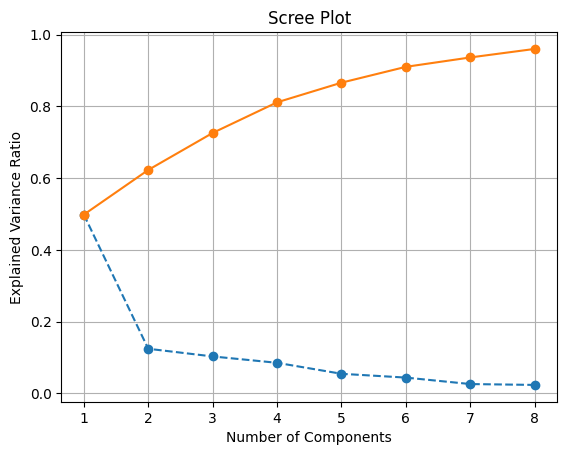

In [54]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [55]:
pca.explained_variance_ratio_

array([0.49828171, 0.12448081, 0.10310627, 0.08535293, 0.05474164,
       0.04415728, 0.02615464, 0.02373809])

## Models with PCA

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.2296234662150756
Mean Squared Error: 0.08934497461840403
Root Mean Squared Error: 0.29890629738833546
R-squared: 0.44391931058858636


In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=6, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train_pca)
X_poly_test = poly_features.transform(X_test_pca)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

y_poly_pred = poly_reg.predict(X_poly_test)

mae = mean_absolute_error(y_test, y_poly_pred)
mse = mean_squared_error(y_test, y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_poly_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.18329416655271308
Mean Squared Error: 0.4964849082770846
Root Mean Squared Error: 0.7046168521097722
R-squared: -2.090108551222457


In [58]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train_pca, y_train)

y_pred = sgd_reg.predict(X_test_pca)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.23262730866577366
Mean Squared Error: 0.09108763266827966
Root Mean Squared Error: 0.3018072773613646
R-squared: 0.43307305433386056


In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 25, random_state=42)
tree_reg.fit(X_train_pca, y_train)

y_pred = tree_reg.predict(X_test_pca)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.1473995517840562
Mean Squared Error: 0.05269091114181119
Root Mean Squared Error: 0.22954500896732907
R-squared: 0.6720532036793667


In [60]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 500, max_depth = 100,
                            min_samples_split = 2, random_state=42)
rfr.fit(X_train_pca, y_train)

y_pred = rfr.predict(X_test_pca)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.10771791780821924
Mean Squared Error: 0.023938443647561678
Root Mean Squared Error: 0.1547205340204127
R-squared: 0.8510077785143797


In [61]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 100, learning_rate = 0.1, random_state=42)
gbrt.fit(X_train_pca, y_train)

y_pred = gbrt.predict(X_test_pca)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.19857130992104247
Mean Squared Error: 0.06765191648153508
Root Mean Squared Error: 0.26009982022587996
R-squared: 0.5789363137912165


## Conclusion of Regression

The best model is the Random Forest Regressor Model with an MAE of 0.10771791780821924.

## Classification part starts from here. (Classification of Region)

Classification into region

## Splitting the data into X_train, y_train, X_test, y_test

In [63]:
train_set

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Week,region_encoded,type_encoded
16391,1.88,4.999979,6.771248,0.000000,8.378414,2.037317,0.000000,2017,7,31,1
4990,0.81,11.954649,11.938399,9.976941,11.883088,11.549493,0.000000,2016,50,41,0
13653,2.01,7.614347,7.836054,0.000000,7.522806,4.205588,0.000000,2016,4,33,1
2074,1.02,11.266983,10.565267,4.907125,10.165185,7.853205,0.000000,2015,46,39,0
12377,1.53,5.095283,10.563032,0.000000,7.436358,0.000000,0.000000,2016,28,8,1
...,...,...,...,...,...,...,...,...,...,...,...
11284,1.55,7.782870,9.230842,0.000000,5.838809,0.000000,0.000000,2015,26,41,1
11964,1.55,3.322154,5.849872,0.000000,6.710706,0.000000,0.000000,2016,31,0,1
5390,1.31,6.900972,10.914206,6.646481,10.192303,0.000000,0.000000,2016,34,49,0
860,1.13,10.663526,11.852285,7.615451,11.384564,7.945346,7.382535,2015,28,16,0


In [64]:
X_train = train_set.drop('region_encoded', axis = 1)
y_train = train_set['region_encoded']

In [65]:
X_test = test_set.drop('region_encoded', axis = 1)
y_test = test_set['region_encoded']

## Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

In [77]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

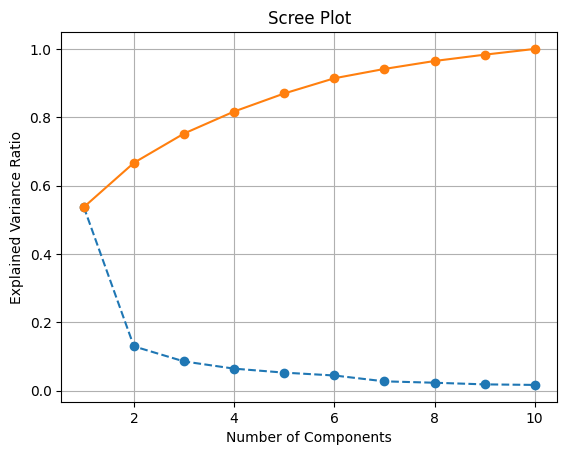

In [78]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [79]:
pca.explained_variance_ratio_

array([0.5371415 , 0.12966565, 0.08559251, 0.06447125, 0.05280234,
       0.04445156, 0.02732222, 0.02324697, 0.01845258, 0.01685342])

## Models with PCA

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [81]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_pca, y_train)
sgd_clf.score(X_test_pca, y_test)

0.20410958904109588

In [82]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.49561643835616437

In [83]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train)
dt.score(X_test_pca, y_test)

0.6975342465753425

In [84]:
rt = RandomForestClassifier(random_state=42)
rt.fit(X_train_pca, y_train)
rt.score(X_test_pca, y_test)

0.8731506849315068

In [85]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train_pca, y_train)
svc_clf.score(X_test_pca, y_test)

0.8093150684931507

In [86]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_pca, y_train)
knn_clf.score(X_test_pca, y_test)

0.8010958904109589

## Conclusion of Classification

The best model is RandomForestClassifier with a Testing Accuracy of over 87%.